# Week 3 Check-In
## Team Spotiflies: Joanna, Aaron, Aubrey, Kennedy, Aster, Ethan

In [1]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


### We used the same clean dataset as the week 2 check in.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Reading in the cleaned data from previous week check in
spotify = pd.read_csv("csv_outputs/cleaned_spotify.csv")
numeric_spotify = spotify.select_dtypes(include=[np.number])
numeric_spotify = numeric_spotify.loc[:, ~numeric_spotify.columns.isin(["mode", "key", "time_signature"])]
numeric_spotify

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...
113994,21,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113995,22,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113996,22,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113997,41,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


Let's use the `popularity` variable as our response variable, as accurate analysis of this variable can be useful in the real world.

Let's compare this against the `energy` variable, as the relationship between the energy level of a song and its subsequent popularity is always something we've been curious about.

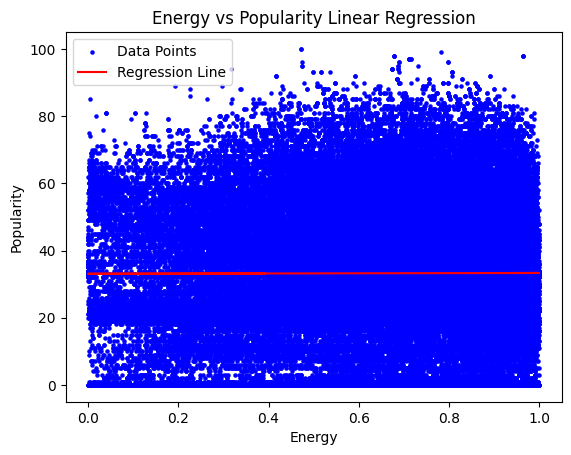

In [7]:
# Modeling regression of energy versus popularity
# We are doing a linear and quadratic regression analysis.

# Making scatterplots for each variable vs popularity 
# correlated_features = [
#     ("energy", "popularity"),
# ]
# for (i, j) in correlated_features:
#     plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 1))(np.unique(numeric_spotify[i])), color='red')
#     plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 2))(np.unique(numeric_spotify[i])), color='orange')
#     plt.scatter(numeric_spotify[i], numeric_spotify[j], s=5)
#     plt.xlabel(i)
#     plt.ylabel(j)
#     plt.show()

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

spotify_train, spotify_test = train_test_split(spotify, test_size=.2)

# Reshape the data to fit the model
X = np.array(spotify_train['energy']).reshape(-1, 1)    # Independent variable: energy
y = np.array(spotify_train['popularity'])               # Dependent variable: popularity


# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Predict values of y based on the model
y_pred = linear_reg.predict(X)

# Plotting the scatter plot of the original data
plt.scatter(spotify_train['energy'], spotify_train['popularity'], color='blue', s=5, label="Data Points")

# Plotting the regression line
plt.plot(spotify_train['energy'], y_pred, color='red', label="Regression Line")

# Adding labels and title
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Energy vs Popularity Linear Regression')
plt.legend()

# Show the plot
plt.show()

